# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[ 1.65826879e+00,  7.74522716e-04],
        [ 3.87321628e-01,  1.16974712e+00],
        [-5.98407748e-01,  1.55049496e-01],
        [-1.15277904e+00,  1.49235883e-01],
        [ 9.22931366e-01, -1.05816648e+00]]),
 array([1, 1, 1, 0, 0]))

In [3]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [4]:
# sampling
n = 5000

Y_generative = np.repeat([1,-1], n)
X_generative = np.zeros((2*n, 2))
X_generative[:n,] = np.random.multivariate_normal(m1, sigma, n)
X_generative[n:,] = np.random.multivariate_normal(m2, sigma, n)

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


Answer: Yes, it corresponds to a logistic model.

$$\beta_0 = \log{\frac{1-\pi}{\pi}} + \frac{1}{2}(m_2' \Sigma^{-1}m_2 - m_1'\Sigma^{-1}m_1)$$
$$\beta = \Sigma^{-1} (m_1-m_2)$$

#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [5]:
# computing beta_0 and beta using the formulas
pi = 0.5
sigma_inv = np.linalg.inv(sigma)
beta0 = np.log(pi / (1 - pi)) + (m2 @ sigma_inv @ m2 - m1 @ sigma_inv @ m1) / 2
beta = sigma_inv @ (m1 - m2)
beta0, beta

(-2.0, array([2., 2.]))

In [6]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-2.07261964]), array([[2.07026149, 1.99245562]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [7]:
# sampling

n = 10000
n_successes = np.random.binomial(n, 0.5)

X_discriminative = np.zeros((n, 2))
X_discriminative[:n_successes,] = np.random.multivariate_normal(m1, sigma, n_successes)
X_discriminative[n_successes:,] = np.random.multivariate_normal(m2, sigma, n - n_successes)

beta0 = -2
beta = np.array([2,2])
probs = 1 / (1 + np.exp(-beta0 - X_discriminative @ beta))
Y_discriminative = np.random.binomial(1, probs, n)

In [8]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_discriminative, Y_discriminative)
mod_b.intercept_, mod_b.coef_

(array([-1.98072147]), array([[1.97154705, 2.01563016]]))

#### Second bullet point

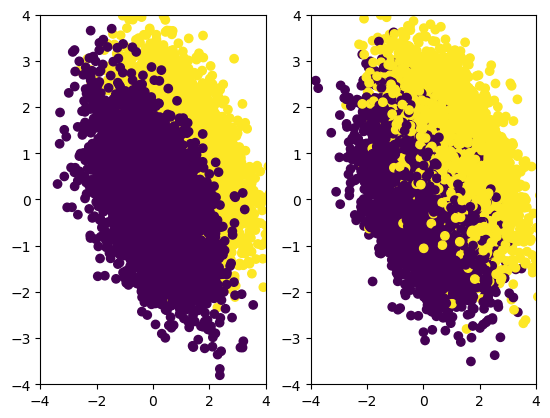

In [9]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:, 0], X_generative[:, 1], c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_discriminative[:, 0], X_discriminative[:, 1], c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

They are equivalent in terms of joint distribution, but in generative approach we control the $\pi$ parameter $\beta$ hard to obtain. in discriminative approach we know $\beta$ and $\pi$ needs to be estimated.

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

Answer to Q1:

<a href="https://ibb.co/ph0YwXz"><img src="https://i.ibb.co/Bnz03sZ/431548209-291845793718945-936117977676313104-n.jpg" alt="431548209-291845793718945-936117977676313104-n" border="0" /></a>

In [10]:
# sampling

n1 = 1000
x1 = np.random.exponential(1/1, size=n1)

n2 = 2000
x2 = np.random.exponential(1/2, size=n2)

x = np.atleast_2d(np.concatenate([x1, x2])).T
y = np.concatenate([np.repeat(1, n1), np.repeat(-1, n2)])


In [11]:
# a model
mod = LogisticRegression(penalty=None)
mod.fit(x, y)
mod.intercept_, mod.coef_

(array([-1.40037971]), array([[0.9820881]]))

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

(Q1) has answer to the hint.

Q2: if $\pi$ is fixed, we cannot choose intercept

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

In [12]:
beta1 = 1
pi_c = n1/(n2)
beta0 = np.log(pi_c/(1 + beta1))
beta0

-1.3862943611198906